In [1]:
import numpy as np
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE,RandomOverSampler
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import dtale

In [2]:
df=pd.read_csv(r'C:\Users\Pradeep Sharma\OneDrive\Desktop\zycus assignement\TrainingData_V1.csv')
dtale.show(df)

2021-07-06 08:40:42,466 - INFO     - NumExpr defaulting to 8 threads.


In [3]:
df['order_date']=pd.to_datetime(df['order_date'])
df['delivery_date']=pd.to_datetime(df['delivery_date'])
df['user_dob']=pd.to_datetime(df['user_dob'])
df['user_reg_date']=pd.to_datetime(df['user_reg_date'])
df['present_date']='2017-01-01'
df['present_date']=pd.to_datetime(df['present_date'])
df['age_of_user']=df['present_date']-df['user_dob']
df['age_on_network']=df['present_date']-df['user_reg_date']
df['age_of_user']=df['age_of_user'].dt.days
df['age_on_network']=df['age_on_network'].dt.days
df['age_of_user']=df['age_of_user']/365
df['age_of_user']=df['age_of_user'].round(0)
df['age_on_network']=df['age_on_network']

In [325]:
df['days_user_taken_to_get_register']=((df['user_reg_date']-df['user_dob'])/365).dt.days
df['user_month_of_birth']=df['user_dob'].dt.month
df['order_of_month']=df['order_date'].dt.month

In [326]:
df.shape

(79945, 20)

In [327]:
df.columns

Index(['order_item_id', 'order_date', 'delivery_date', 'item_id', 'item_size',
       'item_color', 'brand_id', 'item_price', 'user_id', 'user_title',
       'user_dob', 'user_state', 'user_reg_date', 'return', 'present_date',
       'age_of_user', 'age_on_network', 'days_user_taken_to_get_register',
       'user_month_of_birth', 'order_of_month'],
      dtype='object')

In [328]:
df.isnull().sum()

order_item_id                         0
order_date                            0
delivery_date                      7436
item_id                               0
item_size                             0
item_color                            0
brand_id                              0
item_price                            0
user_id                               0
user_title                            0
user_dob                           6989
user_state                            0
user_reg_date                         0
return                                0
present_date                          0
age_of_user                        6989
age_on_network                        0
days_user_taken_to_get_register    6989
user_month_of_birth                6989
order_of_month                        0
dtype: int64

In [329]:
df.columns

Index(['order_item_id', 'order_date', 'delivery_date', 'item_id', 'item_size',
       'item_color', 'brand_id', 'item_price', 'user_id', 'user_title',
       'user_dob', 'user_state', 'user_reg_date', 'return', 'present_date',
       'age_of_user', 'age_on_network', 'days_user_taken_to_get_register',
       'user_month_of_birth', 'order_of_month'],
      dtype='object')

In [330]:
df.columns

Index(['order_item_id', 'order_date', 'delivery_date', 'item_id', 'item_size',
       'item_color', 'brand_id', 'item_price', 'user_id', 'user_title',
       'user_dob', 'user_state', 'user_reg_date', 'return', 'present_date',
       'age_of_user', 'age_on_network', 'days_user_taken_to_get_register',
       'user_month_of_birth', 'order_of_month'],
      dtype='object')

In [331]:
#df.drop('order_date_y',axis=1,inplace=True)
#df.rename(columns={'order_date_x':'order_date'},inplace=True)

In [332]:
df1=df[['item_id','order_date', 'delivery_date']]

In [333]:
df1

,item_id,order_date,delivery_date
0,643,2016-06-22,2016-06-27
1,195,2016-06-22,2016-06-27
2,25,2016-06-22,2016-05-07
3,173,2016-06-23,2016-06-26
4,394,2016-06-23,2016-06-26
...,...,...,...
79940,39,2016-11-09,2016-12-09
79941,1498,2016-11-09,NaT
79942,1806,2016-11-09,2016-12-09
79943,1530,2016-11-09,2016-12-09


In [334]:
df1['no_of_days_to_deliver']=df1['delivery_date']-df1['order_date']

<ipython-input-334-8dd21f8ad9a4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [335]:
df1.isnull().sum()

item_id                     0
order_date                  0
delivery_date            7436
no_of_days_to_deliver    7436
dtype: int64

In [336]:
df1['no_of_days_to_deliver']=df1['no_of_days_to_deliver'].dt.days


<ipython-input-336-74b1f2dac229>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [337]:
df2=df1[df1['no_of_days_to_deliver']>=0]

In [338]:
df2

,item_id,order_date,delivery_date,no_of_days_to_deliver
0,643,2016-06-22,2016-06-27,5.0
1,195,2016-06-22,2016-06-27,5.0
3,173,2016-06-23,2016-06-26,3.0
4,394,2016-06-23,2016-06-26,3.0
5,448,2016-06-23,2016-06-26,3.0
...,...,...,...,...
79939,1532,2016-11-09,2016-12-09,30.0
79940,39,2016-11-09,2016-12-09,30.0
79942,1806,2016-11-09,2016-12-09,30.0
79943,1530,2016-11-09,2016-12-09,30.0


In [339]:
dg=df2.groupby('item_id').agg(no_of_days_to_taken_to_deliver=('no_of_days_to_deliver','median')).reset_index()

In [340]:
dg

,item_id,no_of_days_to_taken_to_deliver
0,1,4.5
1,2,4.0
2,3,3.0
3,4,30.0
4,5,4.0
...,...,...
1801,2230,46.5
1802,2232,42.0
1803,2237,217.0
1804,2238,30.5


In [341]:
df_new=pd.merge(df,dg,on='item_id',how='left')

In [342]:
df_new

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,...,user_state,user_reg_date,return,present_date,age_of_user,age_on_network,days_user_taken_to_get_register,user_month_of_birth,order_of_month,no_of_days_to_taken_to_deliver
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.9,30822,Mrs,...,1013,2016-06-23,0,2017-01-01,48.0,192,47.0,4.0,6,13.0
1,10,2016-06-22,2016-06-27,195,xxl,grey,46,19.9,30823,Mrs,...,1001,2015-03-15,1,2017-01-01,47.0,658,44.0,4.0,6,3.0
2,11,2016-06-22,2016-05-07,25,xxl,grey,5,79.9,30823,Mrs,...,1001,2015-03-15,0,2017-01-01,47.0,658,44.0,4.0,6,3.0
3,32,2016-06-23,2016-06-26,173,m,brown,20,19.9,17234,Mrs,...,1013,2015-02-17,0,2017-01-01,56.0,684,54.0,9.0,6,3.0
4,43,2016-06-23,2016-06-26,394,40,black,44,90.0,30827,Mrs,...,1006,2016-09-02,1,2017-01-01,NaN,121,NaN,NaN,6,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79940,99942,2016-11-09,2016-12-09,39,41,blue,26,89.9,48232,Mrs,...,1007,2016-12-09,1,2017-01-01,75.0,23,75.0,10.0,11,4.0
79941,99954,2016-11-09,NaT,1498,42,green,6,59.9,48234,Mrs,...,1007,2016-12-09,0,2017-01-01,55.0,23,54.0,2.0,11,72.5
79942,99980,2016-11-09,2016-12-09,1806,unsized,brown,110,16.9,48240,Mr,...,1010,2015-02-17,0,2017-01-01,45.0,684,43.0,7.0,11,31.0
79943,99987,2016-11-09,2016-12-09,1530,l,black,56,79.9,12130,Mrs,...,1008,2016-01-20,0,2017-01-01,NaN,347,NaN,NaN,11,30.0


In [343]:
df_new.columns

Index(['order_item_id', 'order_date', 'delivery_date', 'item_id', 'item_size',
       'item_color', 'brand_id', 'item_price', 'user_id', 'user_title',
       'user_dob', 'user_state', 'user_reg_date', 'return', 'present_date',
       'age_of_user', 'age_on_network', 'days_user_taken_to_get_register',
       'user_month_of_birth', 'order_of_month',
       'no_of_days_to_taken_to_deliver'],
      dtype='object')

In [344]:
df_final=df_new[['item_id', 'item_size',
       'item_color', 'brand_id', 'item_price','user_title',
       'user_state','age_of_user', 'age_on_network', 'days_user_taken_to_get_register','no_of_days_to_taken_to_deliver','user_month_of_birth','order_of_month','return']]

In [345]:
df_cat=df_final.select_dtypes(include=['object'])
df_num=df_final.select_dtypes(include=['int32','int64','float32','float64'])
import pandas
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df_cat=df_cat.apply(le.fit_transform)

In [346]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x
df_num1=df_num.apply(lambda x: outlier_capping(x))

In [347]:
df_final1=pd.concat([df_cat,df_num1],axis=1)

In [348]:
df_final1.fillna(-99,axis=1,inplace=True)

In [349]:
df_final1.shape

(79945, 14)

In [350]:
x=df_final1.iloc[:,0:13]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1=scaler.fit_transform(x)
y=df_final1['return']

In [351]:
x.columns

Index(['item_size', 'item_color', 'user_title', 'item_id', 'brand_id',
       'item_price', 'user_state', 'age_of_user', 'age_on_network',
       'days_user_taken_to_get_register', 'no_of_days_to_taken_to_deliver',
       'user_month_of_birth', 'order_of_month'],
      dtype='object')

In [352]:
train_x,test_x,train_y,test_y = train_test_split(x1,y,test_size=.3,random_state=42,stratify=y)

In [353]:
y.value_counts()

0    43283
1    36662
Name: return, dtype: int64

In [382]:
model = XGBClassifier(max_depth=6,n_estimators=50,random_state=42,scale_pos_weight=1.18,learning_rate=0.3)
model.fit(train_x, train_y)
model.score(train_x, train_y),model.score(test_x, test_y)

[14:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.6812422937402834, 0.6127001334222815)

In [385]:
model = XGBClassifier(max_depth=3,n_estimators=600,random_state=42,scale_pos_weight=1.18,learning_rate=0.3,reg_alpha=0.4,reg_lambda=0.9)
model.fit(train_x, train_y)
model.score(train_x, train_y),model.score(test_x, test_y)

[14:02:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.6822429906542056, 0.6179119412941961)

In [386]:
zz=model.predict(test_x)
print(classification_report(test_y,zz))

              precision    recall  f1-score   support

           0       0.66      0.60      0.63     12985
           1       0.57      0.64      0.61     10999

    accuracy                           0.62     23984
   macro avg       0.62      0.62      0.62     23984
weighted avg       0.62      0.62      0.62     23984



Text(0.5, 0, 'Random Forest Feature Importance')

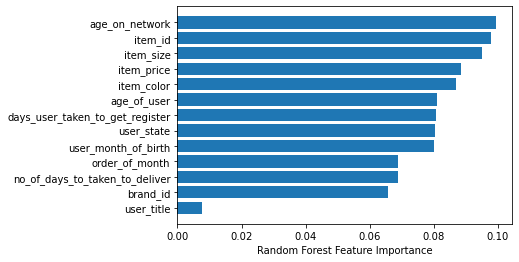

In [374]:
from matplotlib import pyplot as plt
clf = RandomForestClassifier()
clf.fit(train_x,train_y)
sorted_idx = clf.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [387]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(test_y, zz))

,0,1
0,7739,5246
1,3918,7081


In [380]:
import joblib
joblib.dump(model, 'xg_boost.pkl')

['xg_boost.pkl']